# Group 9 Final Project 

# Introduction

The year is irrelevant; the point is that we are deep inside of a dystopian future.

There are too many penguins.

Far too many penguins.

To avoid the need to take many precise measurements, we are to determine a small set of measurements to predict a penguin's species.

We accomplish this via machine learning.

## 1. Group Contributions

Deana Moghaddas, Gabriel Ramirez, Shirley Tang - UCLA PIC 16A Fall 2020

# 2. Exploratory Analysis
We'll start off our project by importing some needed libraries and loading in the Palmer Penguins dataset to work with. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing

In [2]:
#import and read in data
import urllib
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('palmer_penguins.csv', 'wb') as f:
    f.write(filedata.read())

penguins = pd.read_csv('palmer_penguins.csv') #load in data
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Through previous discussions as well as our own explorations with different models from HW7, we have found that the culmen length and depth of the penguins contain measurements that may be useful in predicting a species of penguins. To analyze this idea, we'll explore some figures using culmen length and depth.

#### Exploring a Scatterplot of Culmen Length and Depth by Species
First, we'll use a scatterplot with culmen length on the x-axis and culmen depth on the y-axis, and color each point (in this case, a penguin) by species.

[Text(30.25, 0.5, 'Culmen Depth (mm)'),
 Text(0.5, 15.0, 'Culmen Length (mm)'),
 Text(0.5, 1.0, 'Culmen Length by Depth Per Penguin Species')]

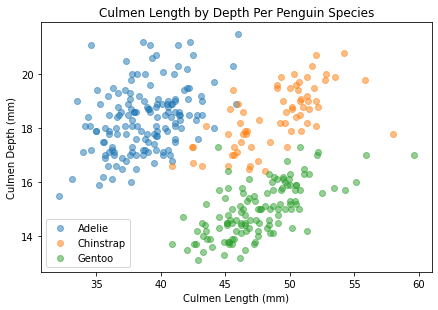

In [3]:
species = penguins["Species"].unique() #extract all unique species

fig, ax = plt.subplots(1)
for i in range(len(species)):
    penguin_data = penguins[penguins["Species"]==species[i]] #subset data for all unique species
    ax.scatter(penguin_data["Culmen Length (mm)"], 
               penguin_data["Culmen Depth (mm)"], 
               label = species[i].split()[0], alpha = 0.5) #plot culmen length against culmen depth

plt.tight_layout()
ax.legend()
ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)", title = "Culmen Length by Depth Per Penguin Species")


Here, we have created a scatterplot of the all of the penguins in the data set, plotted by `Culmen Depth (mm)` against `Culmen Length (mm)` and color coded by species. From the scatterplot, we see that the bulk of the three penguin species occupy different regions of the scatterplot. We see that, on average, Adelies have shorter but deeper culmens; Chinstraps have longer and deeper culmens; and Gentoos have longer but shallower culmens. This indicates that the average Adelie penguin would have noticeably different measurements from a Chinstrap or Gentoo, and vice-versa for each pair of penguin species. 

We also notice that there are some outliers within each species whose measurements place them closer to or inside of a region mainly pertaining to a different species, signalling that some outliers in the data set could be difficult to predict the species of correctly for a machine learning model based on these traits.

#### Exploring Culmen Depth with a Histogram
Next up, we'll explore a little bit more about culmen depth specifically by plotting the depths on a histogram, colored by species of penguins. Doing so will allow us to learn a bit more about how many penguins fall under which ranges of culmen depths, and allows us to see the distribution of penguins and their culmen depths as well.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Culmen Depth (mm)'),
 Text(0.5, 1.0, 'Culmen Depth Per Penguin Species')]

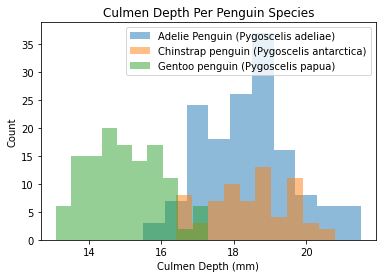

In [4]:
species = penguins["Species"].unique() # get unique values of Species
species

fig, ax = plt.subplots(1)

for kind in species:
    penguin_data = penguins[penguins["Species"]==kind] # get rows of each species
    penguin_data = penguin_data[penguin_data["Culmen Depth (mm)"].notnull()]  
    ax.hist(penguin_data["Culmen Depth (mm)"], label = kind, alpha = 0.5) # plot histogram

ax.legend() 
ax.set(xlabel = "Culmen Depth (mm)", ylabel = "Count", title = "Culmen Depth Per Penguin Species")

In the histogram above, the `Culmen Depth (mm)` is plotted with each species in a different color. Each bar represents the number of penguins that have each particular depth of the culmen in millimeters. As indicated in the plot, Gentoo penguins, shown in green, seem to have shorter culmen depths, while Adele penguins, as shown in blue, generally have longer culmen depths. Chinstrap penguins overlap with Adelies in that they also tend to have longer culmen depths compared to Gentoos. There also seems to be a small overlap between the upper end of culmen depths for Gentoo penguins, and the lower end of culmen depths for Adelie and Chinstrap penguins.

#### Exploring Culmen Length and Depth by Species and Location
To explore some other columns of the `penguins` dataset, we'll plot scatterplots of the penguins utilizing the island they are on, while continuing to look at the culmen length and depth.

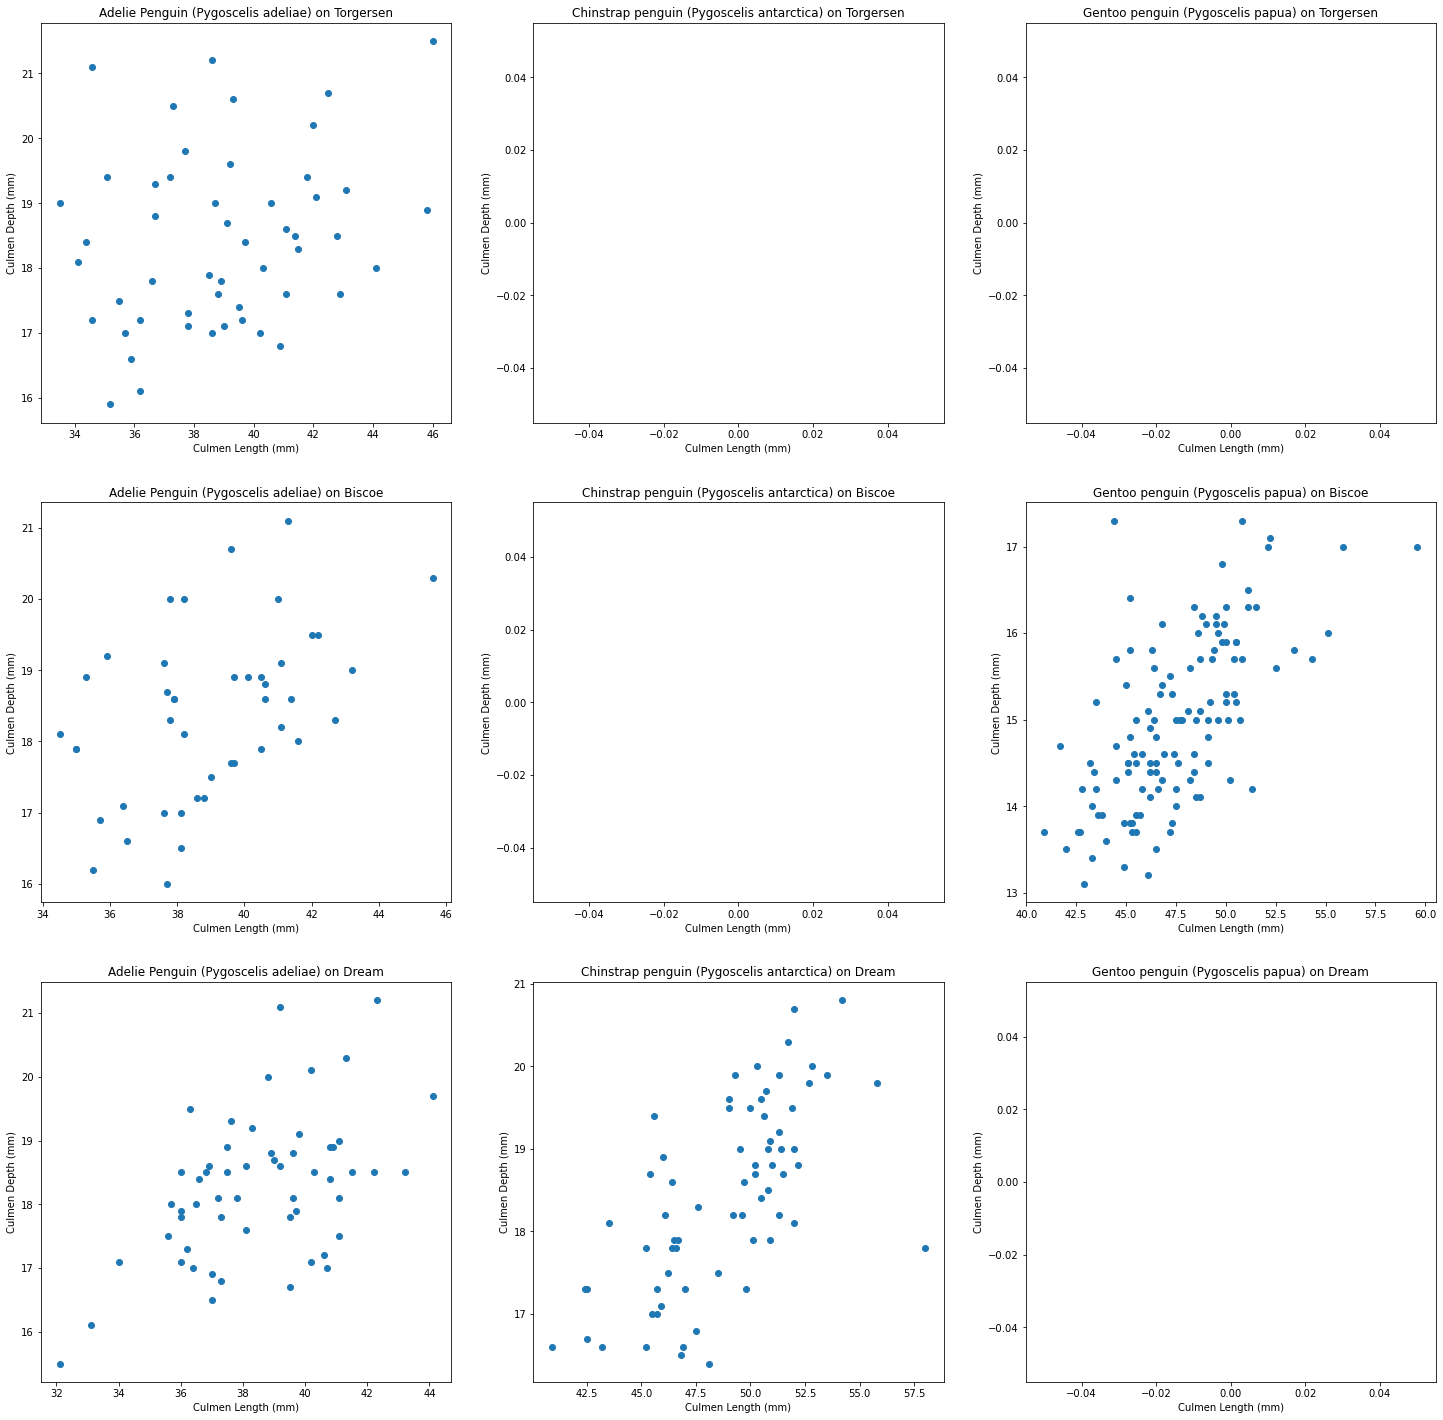

In [5]:
species = penguins["Species"].unique() #get unique species
islands = penguins["Island"].unique() #get unique islands

fig, ax = plt.subplots(3,3, figsize = (25,25))
for i in range(len(species)): #loop over length of species
    penguin_data = penguins[penguins["Island"]==islands[i]] # iterate over set of unique islands
    for j in range(len(species)): #loop over length of species
        penguin_species_data = penguin_data[penguin_data["Species"]==species[j]] # loop through each species on the island 

        ax[i,j].scatter(penguin_species_data["Culmen Length (mm)"], 
                        penguin_species_data["Culmen Depth (mm)"], 
                        label = species[j].split()[0], alpha = 1)
        
        ax[i,j].set(xlabel = "Culmen Length (mm)", 
                    ylabel = "Culmen Depth (mm)", 
                    title = species[j] + " on " + islands[i])

In the scatter plots above, we plotted Culmen Length by Depth for each penguin species on each island. As seen above, increased Culmen length is positively correlated with Culmen Depth for Chinstrap penguins on island Dream, Adelie penguins on island Dream, Gentoo penguins on island Biscoe, and Adelie penguins on island Biscoe. Adelie penguins on island Torgerson show no correlation whatsoever. We also noticed that some plots were empty, meaning that species does not exist on the island; for example, Adelie penguins are the only species on island Torgerson.

#### Exploring More Penguin Measurements by Sex and Species using Tables
To analyze another variable, `Sex`, and how each penguin's measurements may differ between males and females and across species, we will plot a few summary tables. This will utilize `groupby()` to view penguin stats by `Species` and `Sex`.

In [6]:
#defining a function to make summary tables
def penguin_summary_table(group_cols, value_cols):
    """
    returns a dataframe of means for values under user specified columns, grouped by user specified variables
    
    Parameters
    ----------
    group_cols: list, column names to group by
    value_cols: list, column values to find means of
    
    Return
    ------
    dataframe of user specified mean values, separated by variables
    """
    return penguins.groupby(group_cols)[value_cols].aggregate(np.mean).round(2)


In [7]:
#Summary Table - Culmen Depth and Culmen Length
penguin_summary_table(["Species", "Sex"], ["Culmen Length (mm)", "Culmen Depth (mm)"])

Culmen Length (mm)  \
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE               37.26   
                                          MALE                 40.39   
Chinstrap penguin (Pygoscelis antarctica) FEMALE               46.57   
                                          MALE                 51.09   
Gentoo penguin (Pygoscelis papua)         .                    44.50   
                                          FEMALE               45.56   
                                          MALE                 49.47   

                                                  Culmen Depth (mm)  
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       FEMALE              17.62  
                                          MALE                19.07  
Chinstrap penguin (Pygoscelis antarctica) FEMALE              17.59  
                                          MALE                19.25  
Gentoo penguin (Pygoscelis papua)         .                   15.70  
                                          FEMALE              14.24  
                                          MALE                15.72

Based off of the means, it looks like across species, the male culmen lengths and depths are generally longer than female culmen lengths and depths. For Chinstrap penguins, both male and females generally have longer culmen lengths compared to males and females in the other two species. Gentoo male and female penguins have the shortest culmen depths compared to the other two species of penguins, while Adelie male and female penguins have the shortest culmen length. Male and female Adelie and Chinstrap culmen depths seem to have a similar mean measurements.

In [8]:
#Summary Table - Body Mass and Flipper Length
penguin_summary_table(["Species", "Sex"], ["Body Mass (g)", "Flipper Length (mm)"])

Body Mass (g)  \
Species                                   Sex                     
Adelie Penguin (Pygoscelis adeliae)       FEMALE        3368.84   
                                          MALE          4043.49   
Chinstrap penguin (Pygoscelis antarctica) FEMALE        3527.21   
                                          MALE          3938.97   
Gentoo penguin (Pygoscelis papua)         .             4875.00   
                                          FEMALE        4679.74   
                                          MALE          5484.84   

                                                  Flipper Length (mm)  
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE               187.79  
                                          MALE                 192.41  
Chinstrap penguin (Pygoscelis antarctica) FEMALE               191.74  
                                          MALE                 199.91  
Gentoo penguin (Pygoscelis papua)         .                    217.00  
                                          FEMALE               212.71  
                                          MALE                 221.54

Male and female Gentoo penguins seem to have the longest flipper lengths and greatest body masses compared to the males and females of the other two species. Male and female Adelie penguins have the shortest flipper lengths and smallest body masses compared to the male and females of the other two species. Males of each species generally had longer flipper lengths and greater body masses compared to females of the same species.

While differences do exist between male and female body mass and flipper length across species, based off of our previous exploration of variation between the culmen lengths and depths in penguins as well as the results from the table above, we decided to deploy our three models using `Culmen Length (mm)`, `Culmen Depth (mm)`, and `Sex`.

# 3. Modeling
We will use Decision Trees, Logistic Regression, and K-nearest Neighbors as our three models of analysis.
### Model 1 - Decision Tree
Starting with a Decision Tree, we will load the data and index the data frame to only include columns of interest; `Sex`, `Culmen Depth (mm)`, `Culmen Length (mm)` and `Species`. We will also drop all rows with missing information so that we don't encounter any issues with them down the line.

In [9]:
penguins = penguins[["Species", "Sex", "Culmen Length (mm)", "Culmen Depth (mm)"]] #index 4 columns
penguins = penguins.dropna() #drop all rows with missing information
penguins

,Species,Sex,Culmen Length (mm),Culmen Depth (mm)
0,Adelie Penguin (Pygoscelis adeliae),MALE,39.1,18.7
1,Adelie Penguin (Pygoscelis adeliae),FEMALE,39.5,17.4
2,Adelie Penguin (Pygoscelis adeliae),FEMALE,40.3,18.0
4,Adelie Penguin (Pygoscelis adeliae),FEMALE,36.7,19.3
5,Adelie Penguin (Pygoscelis adeliae),MALE,39.3,20.6
...,...,...,...,...
338,Gentoo penguin (Pygoscelis papua),FEMALE,47.2,13.7
340,Gentoo penguin (Pygoscelis papua),FEMALE,46.8,14.3
341,Gentoo penguin (Pygoscelis papua),MALE,50.4,15.7
342,Gentoo penguin (Pygoscelis papua),FEMALE,45.2,14.8


To train the model, we first need to split the dataset into "predictor" and "target" variables. 

To predict the species of the penguins given provided data, we need to split the dataset into predictor `X` and target `y` variables. We then split our `X` and `y` datasets into training and testing sets, allocating 80% of `X` and `y` data to training and 20% of `X` and `y` data to testing. 

These datasets are used for all 3 models in this project.

In [10]:
from sklearn.model_selection import train_test_split
from random import seed

seed(3535)

X = penguins.drop(["Species"], axis = 1) #predictor variables - all columns but 'Species'
y = penguins["Species"] #contain target variable - 'Species' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
#80% of data allocated to training, 20% to testing: split both X and y (predictor and target variables)

For data cleaning and preparation, we will write a function to complete the tasks at hand. 

Specifically, we will encode the `Sex` column within the X dataframe (predictor variables) so male/female will instead be represented by integers 1/0; this is easier for the model to work with. 

We will similarly encode the Y dataframe (target variable) so that `Species`, its sole column, would be represented by integers 0/1/2 instead of Adelie/Chinstrap/Gentoo for the same purpose. 

This function, `clean_data` will be used for all three models. 

In [11]:
#Function for cleaning data - Use for all 3 models
def clean_data(X, y):
    """
    function that returns the values of a given data frame and series, as well as the column names for X
    
    Parameters
    ----------
    X: dataframe, predictor variables
    y: series, target variable
    
    Return
    ----------
    cX.values: array, contains column values of X
    cy: array, encoded integers of y
    cX.columns: names of columns of X
    """

    cX = X.copy() #copy of training data
    cy = y.copy() #copy of test data
    le = preprocessing.LabelEncoder() #create LabelEncoder object
    cX["Sex"] = le.fit_transform(cX["Sex"]) #change males and females to 1's and 0's
    cy = le.fit_transform(cy) #give each unique species a number
    
    return(cX.values, cy, cX.columns)
    
#Clean training and test sets
X_train, y_train, labels = clean_data(X_train, y_train) #clean dataframes X_train and y_train
X_test, y_test, labels = clean_data(X_test, y_test) #clean dataframes X_test and y_test

At this point, we want to determine the optimal complexity of the model that is controlled by the `max_depth` parameter within the Decision Tree model. 

Cross validation using the `cross_val_score()` function allows us to get a picture of how our model might perform on real data, or in this case, our test set. We will iterate over a range of numbers and keep track of the best cross validation score and the corresponding `max_depth` parameter that contributed to it. After iterating through 30 possible parameters, we end up with an "optimal" cross validation score and `max_depth` parameter with an accompanying graph displaying cross validation scores across different `max_depth` values.

16 0.9621082621082622


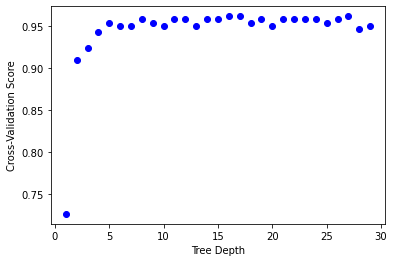

In [12]:
#Determine optimal complexity
from sklearn.model_selection import cross_val_score

fig, ax = plt.subplots(1) #make empty plot
ax.set(xlabel = "Tree Depth", ylabel = "Cross-Validation Score") #label axes

best_score, best_depth = 0, 0 #initialize best score and best depth

for d in range(1, 30): #loop over range of 30 numbers for depth parameter
    T = tree.DecisionTreeClassifier(max_depth = d) #initialize model with depth parameter
    cv_score = cross_val_score(T, X_train, y_train, cv = 10).mean() #get average cross value score for 10 folds
    ax.scatter(d, cv_score, color = "blue") #plot depth parameter against cv score
    
    if cv_score > best_score: #if current cv score is > saved best score...
        best_depth = d #change best depth to current depth parameter
        best_score = cv_score #change best score to current cv score

print(best_depth, best_score)

From using cross validation, the optimal `max_depth` parameter is 16 while the best cv score is 0.96. We can now use this parameter, stored in `best_depth` with our Decision Tree.

In [13]:
T = tree.DecisionTreeClassifier(max_depth = best_depth) #instantiate decision tree model with optimal depth parameter
T.fit(X_train, y_train) #fit model to with training data
T.score(X_train, y_train), T.score(X_test, y_test) #score model on training data and test data

(1.0, 0.9701492537313433)

The model scored relatively accurately with both training and test data. Although lower than the training score, the test score is fairly close with an accuracy of 97%.

We can plot the Decision Tree below to visualize:

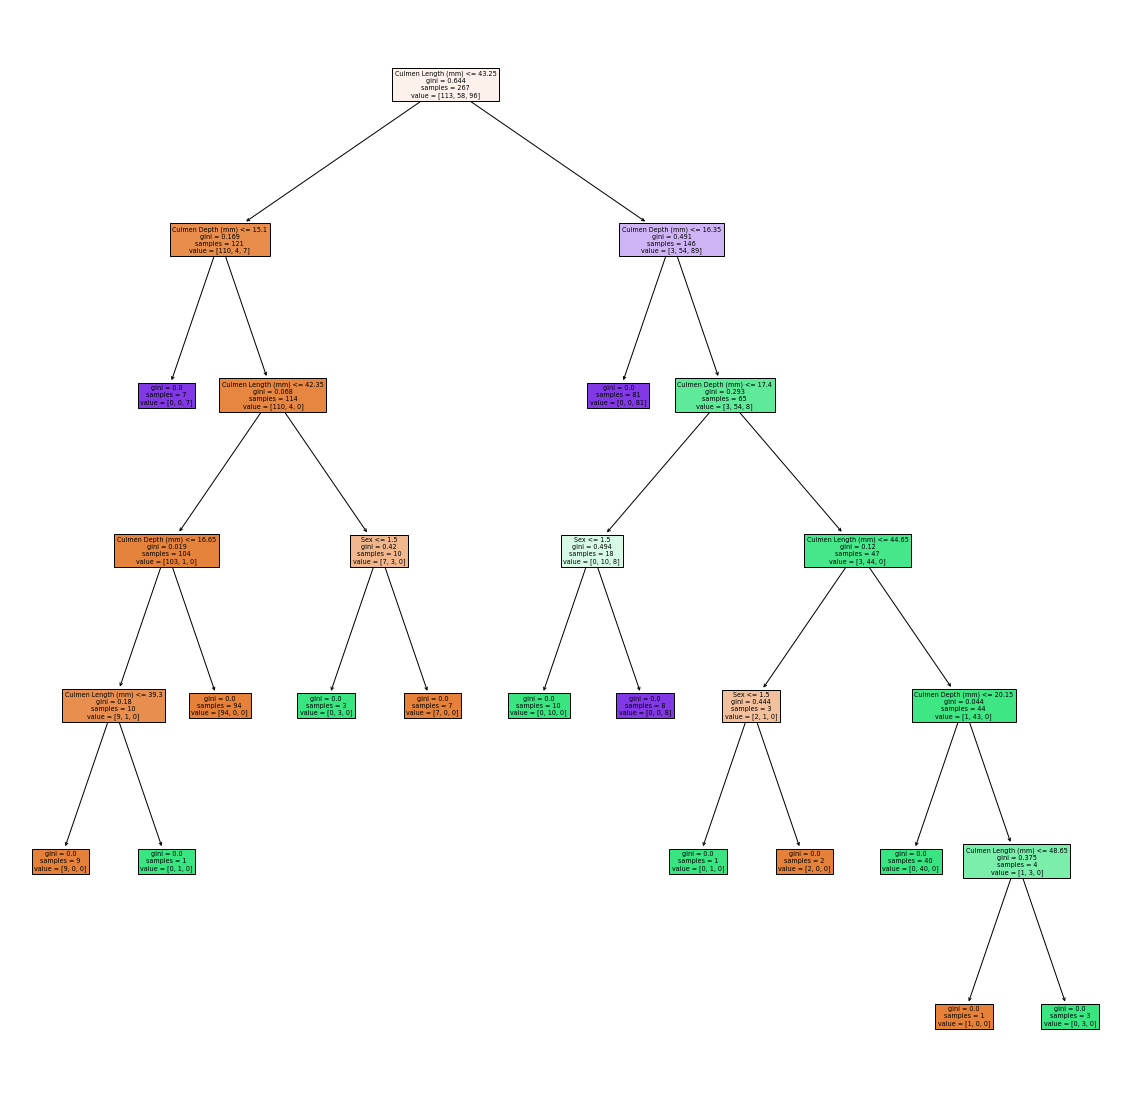

In [14]:
#Visualize Decision Making
fig, ax = plt.subplots(1, figsize = (20, 20))
p = tree.plot_tree(T, filled = True, feature_names = labels)

This visual depicts the pathways taken to make certain decisions: for example, looking at the topmost node of the tree, it looks like the model made decisions depending on whether culmen length was less than or equal to 43.25 as one of the conditions. In this case, deciding on a species of Penguin is using the predictor variables `Sex`, `Culmen Length (mm)`, and `Culmen Depth (mm)`. 

### Model 2 - Logistic Regression
Next, we will use a Logistic Regression model to evaluate our predictor variables. Similar to what we did above for the Decision Tree with finding the optimal complexity parameter, we will also repeat this step for Logistic Regression `C` to ensure model performance.

To use the Logistic Regression model, we will need to import `sklearn.linear_model.LogisticRegression`.

32 0.9925925925925926


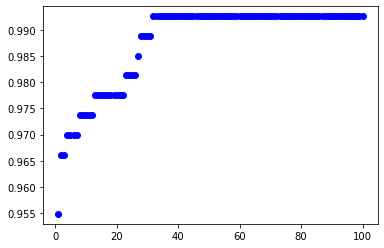

In [15]:
from sklearn.linear_model import LogisticRegression #import the necessary functions
from sklearn.model_selection import cross_val_score
#note that cross_val_score is a measure of how well the trained model performs on the unknown data chunk

fig, ax = plt.subplots(1) #n_estimators vs cross validation score

best_score, best_n = 0, 0

#loop over a wide range to see an overview of performance of random forests
for i in range(1, 101, 1):
    LR = LogisticRegression(C = i, solver = "liblinear")
    cv_score = cross_val_score(LR, X_train, y_train, cv = 10).mean()
    ax.scatter(i, cv_score, color = "blue")
    
    if cv_score > best_score:
        best_n = i
        best_score = cv_score
        
print(best_n, best_score) #from the trend below, it seems like cross validation performance peaks around 32

From using cross validation, the optimal `C` parameter is 32 while the best cv score is 0.99. We can now use this parameter, stored in `best_n` with our Logistic Regression Model.

In [16]:
# fig, ax = plt.subplots(1) #n_estimators vs cross validation score

# best_score, best_n = 0, 0

# #loop over a wide range to see an overview of performance of random forests
# for i in range(15, 26):
#     LR = LogisticRegression(C = i, solver = "liblinear")
#     cv_score = cross_val_score(LR, X_train, y_train, cv = 10).mean()
#     ax.scatter(i, cv_score, color = "blue")
    
#     if cv_score > best_score:
#         best_n = i
#         best_score = cv_score
        
# print(best_n, best_score) #from the trend below, it seems like cross validation scores the highest for C=1

In [17]:
LR = LogisticRegression(C = best_n, solver = "liblinear")
LR.fit(X_train, y_train)
LR.score(X_train, y_train), LR.score(X_test, y_test)

(0.9925093632958801, 0.8059701492537313)

The Logistic Regression model scored somewhat accurately with both training and test data. With this model, compared to the Decision Tree, testing accuracy was lower at 80%.

We can take a look at how the model performed by generating a confusion matrix. Each row of the array represents a Species of penguins, where row 1 is an Adelie, 2 is a Chinstrap, and 3 is a Gentoo. The same stands for the columns, where columns 1, 2, 3 stand for the same three Species in the order listed above. However, rows represent the actual Species according to the data while the columns represent the model's prediction of the Species. 

In [18]:
from sklearn.metrics import confusion_matrix
y_test_pred = LR.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)
c

array([[29,  4,  0],
       [ 0, 10,  0],
       [ 0,  9, 15]])

It looks like the model guessed both Adelie and Gentoo penguins incorrectly as Chinstrap penguins, according to the confusion matrix.

We can also take a look at the specific instances that the model made a mistake, and compare the mistakes to the correct labels.

In [19]:
mistakes = X_test[y_test!=y_test_pred]
mistake_labels = y_test[y_test!=y_test_pred]
mistake_preds = y_test_pred[y_test!=y_test_pred]

mistake_preds, mistake_labels, mistakes

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2]),
 array([[ 0. , 40.9, 16.8],
        [ 0. , 39.6, 17.2],
        [ 0. , 46.5, 14.8],
        [ 0. , 47.2, 15.5],
        [ 0. , 48.5, 15. ],
        [ 1. , 50. , 16.3],
        [ 0. , 38.1, 16.5],
        [ 0. , 45.4, 14.6],
        [ 0. , 44.5, 14.7],
        [ 0. , 47.7, 15. ],
        [ 1. , 45.8, 18.9],
        [ 0. , 50.5, 15.2],
        [ 1. , 59.6, 17. ]]))

Seems like for all the incorrect predictions, the model guessed Chinstrap (as represented by the `1`s, as noted above. The incorrectly identified Adelies may have had greater culmen lengths than usual, and the Gentoos similar measurements as Chinstraps, causing the model to incorrectly predict.

Plotting decision regions will help us visualize how the model sees the data, and how it determines whether or not a point is classified under a particular species. The plot itself will have what looks like colored borders, with the dots within the borders representing the true data and the border itself being the "boundaries" of the model.

In [20]:
def plot_decision_regions(X, penguins, sex, ML): #note that the input sex must be all caps
    """
    A function which plots the decision regions of a trained machine learning model of one sex of the penguins.
    
    Inputs
    -------
    X : the data frame with all three columns of predictor variables (sex, culmen length, culment depth) AND the column of the target variable (species)
    penguins : the data frame with just the predictor variables
    sex : the sex of the penguins that we want to plot the decision regions of (must be inputted as an all-caps string)
    ML : the instance of the machine learning model that we want to plot the decision regions of; already trained.
    
    Outputs
    -------
    Does not return any values.
    Plots the decision regions of the machine learning model on the specified sex.
    
    """
    
    #fetch the columns of predictor data (other than sex) that pertain to just the specified sex
    x = X["Culmen Length (mm)"][X["Sex"]==sex]
    y = X["Culmen Depth (mm)"][X["Sex"]==sex]
    
    #fetch the target data (species) of just the specified sex and encode it
    c = penguins["Species"][penguins["Sex"]==sex]
    le = preprocessing.LabelEncoder()
    c = le.fit_transform(c)
    
    #create a grid based off of the predictor data
    grid_x = np.linspace(x.min(), x.max(), 501)
    grid_y = np.linspace(y.min(), y.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    #construct a data frame which we will fill with the sex, culmen length, and culmen depth data in a grid
    df = pd.DataFrame(columns = ["Sex", "xx.ravel()", "yy.ravel()"])
    
    #depending on the inputted sex, make the sex column either zeros or ones 
    if sex=="MALE":
        sx = np.zeros(251001)
    else:
        sx = np.ones(251001)
    
    #fill the columns of the data frame with the corresponding data series
    df["Sex"] = sx
    df["xx.ravel()"] = xx.ravel()
    df["yy.ravel()"] = yy.ravel()
    
    #get the model's predictions on the data frame and reshape to match xx and yy for graphing purposes
    p = ML.predict(df)
    p = p.reshape(xx.shape)
    
    #create the plot
    fig, ax = plt.subplots(1)
    
    #plot the decision regions, color-coded by species
    ax.contourf(xx, yy, p, cmap = "jet", alpha = 0.25)
    
    #scatterplot the penguins of the specified sex, color-coded by species
    ax.scatter(x, y, c = c, cmap = "jet")
    
    #label the axes and plot appropriately
    ax.set(xlabel = "Culmen Length (mm)",
           ylabel = "Culmen Depth (mm)",
           title = sex + " Penguins")

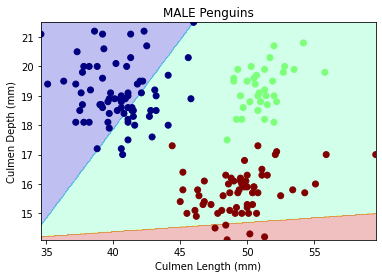

In [21]:
plot_decision_regions(X, penguins, "MALE", LR) # decision region for male penguins

Looks like the green points (male Chinstraps) are all captured within their boundary, while there are a few overlapping points for the blue and red points (male Adelie and Gentoo penguins), indicating that the model had predicted them incorrectly as Chinstraps as observed earlier.

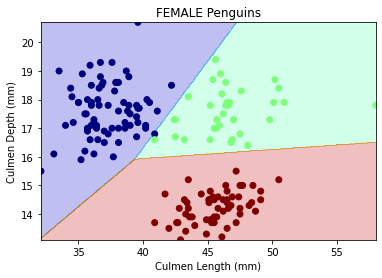

In [22]:
plot_decision_regions(X, penguins, "FEMALE", LR) # decision region for female penguins

For females, an Adelie penguin represented by the blue points looks like it was incorrectly classified, but the Adelie and Gentoo penguins were captured well.

### Model 3 - K Nearest Neighbors

Lastly, we will use the K-nearest Neighbors model. The K-nearest Neighbors model works by accessing the distance between a particular point to points that are around it, and making decisions based off of the existing labels of the surrounding points. To estimate an optimal complexity parameter, we are going to train a K-nearest-neighbors classifier model `neigh` and use `cross_val_score` like with the previous two models.

Each iteration of the for-loop will train a K-nearest-neighbors classifier model of a given n_neighbors and calculate its cross-validation score, and we will plot the results on a scatterplot to visualize. Like for the previous models, cross-validation allows us to get an idea of how the model might perform on a real test set, across varying levels of complexity.

To use the K-nearest-neighbors model, we will need to import `sklearn.neighbors.KNeighborsClassifier`.

1


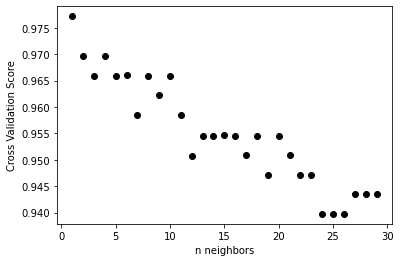

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# create and label an empty plot to visualize the cross validation scores
fig, ax = plt.subplots(1) 
ax.set(xlabel = "n neighbors", ylabel = "Cross Validation Score")

# initialize the best score and best parameter to 0, update this in the loop to determine the highest/best values 
best_score, best_neighbors = 0, 0 

# loop through different values of the complexity parameter n_neighbors
for d in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors = d) # initialize the KNN Model
    cv_score = cross_val_score(neigh, X_train, y_train, cv = 10).mean() # calculate the mean of the cross validation
    ax.scatter(d, cv_score, color = "black") # plot this point on the graph
    
    # if the average was greater than the current best score, save the complexity parameter value and update the
    # best score
    if cv_score > best_score:
        best_neighbors = d
        best_score = cv_score

print(best_neighbors) # print the value of the best complexity parameter

It looks like our optimal complexity parameter 1, according to cross-validation. We can try fitting and scoring the model on unseen testing data here, using the parameter we just found.

In [24]:
#Train Model
neigh = KNeighborsClassifier(n_neighbors = best_neighbors) # instantiate the model
neigh.fit(X_train, y_train) # fit the model using the training data
neigh.score(X_train, y_train), neigh.score(X_test, y_test) # score on the test set

(1.0, 0.9104477611940298)

Looks like our model actually did quite well in training and testing the data, with an accuracy 91%.

Since there still exists mistakes that the model made, we will inspect some wrong answers below using a confusion matrix.

In [25]:
#Inspect Wrong Answers on test data
y_test_pred = neigh.predict(X_test) # create the predictions, these are what the model thinks those digits should be
y_test_pred

array([2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0,
       2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1,
       0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1, 0,
       1])

In [26]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_test_pred) # generate the confusion matrix
c

array([[30,  3,  0],
       [ 0, 10,  0],
       [ 0,  3, 21]])

The values in each `i, j`th entry stand for the number of predictions the model predicted `j` when the Species was actually `i`. It looks like the model made a few errors of mistakening an Adelie and Gentoo for a Chinstrap.

We can use bool indexing to again extract incorrectly-identified Species and see the mistakes:

In [27]:
mistakes = X_test[y_test != y_test_pred] # where model's testing prediction doesn't match with actual data
mistake_labels = y_test[y_test != y_test_pred] # the true labels
mistake_preds = y_test_pred[y_test != y_test_pred] # the mistake predictions

mistake_preds, mistake_labels # there are 4 mistakes here

(array([1, 1, 1, 1, 1, 1]), array([0, 0, 2, 2, 0, 2]))

Mistake predictions show a guess of Chinstrap (1) while the true labels say the penguins were Adelie (0) and Gentoo (2).

We can also see the rows corresponding to the penguin measurements that the model made a mistake:

In [28]:
mistakes # penguin measurements where model made the errors (Sex, Culmen Depth, Culmen Length)

array([[ 0. , 40.9, 16.8],
       [ 1. , 40.7, 17. ],
       [ 1. , 50. , 16.3],
       [ 1. , 45.2, 15.8],
       [ 1. , 45.8, 18.9],
       [ 1. , 59.6, 17. ]])

It seems here that perhaps the Adelie penguins had a greater Culmen lengths than usual, causing it to be associated with points near Chinstraps, and for the model to therefore incorrectly identify it as a Chinstrap penguin. Likewise with the Gentoos, some might have had culmen measurements closer to those of Chinstraps, causing the points in question to be classified as Chinstrap penguins. 

We'll use the same function as used in Logistic Regression, `plot_decision_regions`, for plotting decision regions.

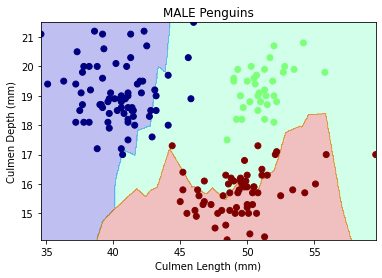

In [29]:
plot_decision_regions(X, penguins, "MALE", neigh)

For males, while Chinstrap penguins were captured within the correct region, Adelies and Gentoos were occasionally classified incorrectly. Similar behavior was seen in the Logistic Regression decision region.

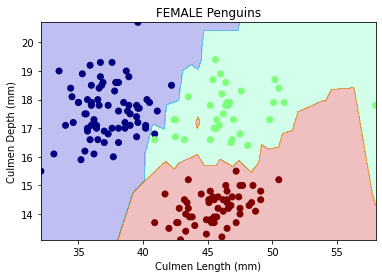

In [30]:
plot_decision_regions(X, penguins, "FEMALE", neigh)

The model looks like it fit the data relatively well for all female penguins, whith a few Chinstrap penguins in the wrong colored region.

# 4. Discussion

It appears that our <b>Decision Tree model</b> performs perfectly on the training data and very well on the test data. Using the optimal `max_depth` parameter, the corresponding cv score had 96% accuracy. Furthermore, scoring our model with training data resulted in 100% accuracy while testing data resulted in 97%. 

Both of these scores are very high, but considering the training data is perfectly fit, there is definitely potential for overfitting. Although this conclusion doesn't seem to be very substantiated in our own analysis considering accuracy was very high with testing data, overfitting may become more evident with different testing data at different percentage splits. 



We see that our <b>Logistic Regression model</b> performs well on the training data, and performs relatively well on the test data. While the model performs worse on the test data, this is to be expected due to the data split from earlier favoring the training set of data. Thus, the model would be expected to perform better on the training data than the test data.

It is worth noting that there are different solvers which can be used for Logistic Regression models. Here, we have opted to use the "liblinear" solver, which is performs better on smaller datasets such as the one we are working with here.

Additionally, is is worth noting that we estimated an optimal value of `C`, the complexity parameter for Logistic Regression, by plotting cross validation scores against values of C above. Using our optimal complexity parameter of 32, we see our model scored a 99% success rate on training data and an 80% success rate on acurately predicting the species of penguins whose data the model had not previously seen before.



Using <b>K-nearest neighbors classifier</b>, it seems that the model performs quite well on training data at 100% accuracy, while scoring around 91% accuracy on testing data. In this case, the model is looking at a certain number of points closest to it (here, it's the value we set in the `n_neighbors` complexity parameter, where `n_neighbors` 3 would be an example of looking at 3 closest points). By looking at the data points closest in distance to a point in evaluation, the model is looking at "neighbors" and voting for the most frequent label to classify the point. To illustrate an example, if many of the points near a particular point was classified as an Adelie penguin according to the model, the particular point would most likely to labeled as an Adelie as well due to the closeness in distance.

Though we would usually standardize data when using k-nearest-neighbor classifiers using `sklearn.preprocessing.StandardScaler` to make sure that the variables measured are not affected by the units they are in, it is interesting to note here that since both of our quantitative variables (Culmen depth and length) are measured in millimeters (mm), we decided to keep the data as is. For future modeling that involves measurements on different scales, however, standardizing data would be a necessary step to ensure the distance between points isn't affected by different scales of measurement.



Looking at the scores for each model on the testing data, we saw that the Decision Tree had a 97% accuracy, the Logistic Regression model had an 80% accuracy, and the K-nearest neighbors model had a 91% accuracy. Based off of these results in accuracy, <b>we would recommend using the Decision Tree model</b> with `Sex`, `Culmen Depth (mm)`, `Culmen Length (mm)` as predictor variables. 

In terms of improvement, overfitting is a potential issue to address with the model giving more accurate predictions with training data versus the testing data. Perhaps training and testing on a bigger test set may make the model give more accurate predictions and give us a more realistic picture, since we saw 100% accuracy on training data and this may not always be the case with a bigger dataset. With the same idea, adding more variables as predictors may cause the model to overfit if the variables are very unique, therefore making the conditions of the decision tree itself quite specific and therefore affecting any generalization on unseen data.

A possible danger of using this model is the existence of outliers in the dataset. In the penguin world, there may undoubtedly be a few penguins that have measurements that are closer to the outer bounds of a different species, in which the model might incorrectly think that it is from that different species. Outliers may also have a greater effect on the conditions that the Decision Tree is based off of, which would influence its performance and may cause greater misclassifications. 